# Visualization Notebook

 * 2-D Plot
 * Histogram
 * Heat Map - 1
 * Heat Map - 2
 * Ellipse
 * Contours
 * Gradient Descent
 * Surface
 * Beta Distribution
 * Matrix

#### Standard Header

In [13]:
%run include/utils.py
%matplotlib inline

For the complete list of  examples, see http://www.labri.fr/perso/nrougier/teaching/matplotlib/

### 2-D Plot

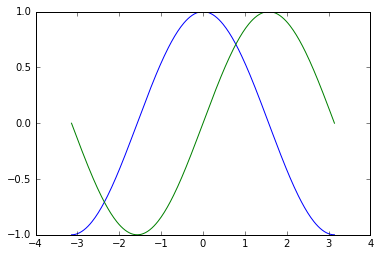

In [14]:
X = np.linspace(-np.pi, np.pi, 256)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

plt.show()

### Histogram

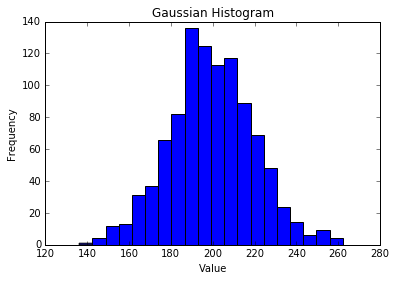

In [15]:
mu, sigma = 200, 20
gaussian_numbers = mu + sigma*np.random.randn(1000)
plt.hist(gaussian_numbers, bins=20)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Heat Map - 1

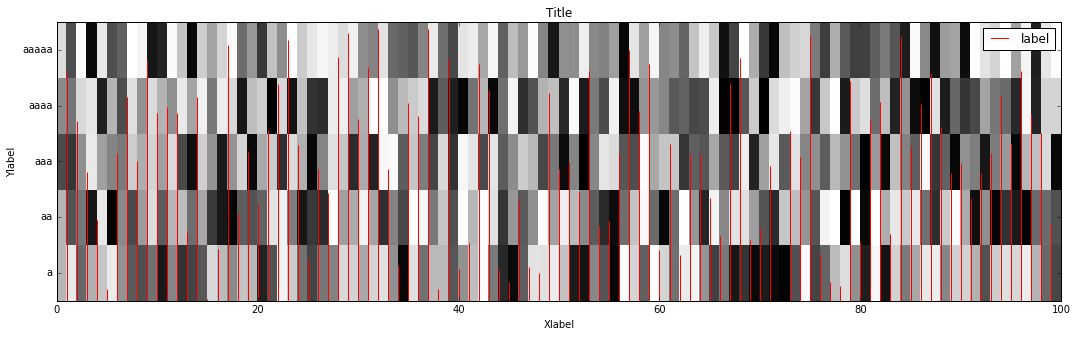

In [16]:
def draw_hist(hist, x_vals=None, y_tick_labels=None):
    _shape = hist.shape
    if y_tick_labels is not None and not _shape[0]==len(y_tick_labels):
        raise ValueError("hist.nrows() must be the same as len(y_tick_labels)")
    elif x_vals is not None and not _shape[1]==len(x_vals):
        raise ValueError("hist.ncols() must be the same as len(x_vals)")
    fig = plt.figure(figsize=(18,5))
    ax = fig.gca()
    y,x = np.mgrid[slice(0, _shape[0]+1, 1),slice(0,_shape[1]+1, 1)]
    ax.pcolormesh(x, y, hist, cmap=plt.cm.Greys, vmin=0, vmax=1)
    ax.hold(True)
    if x_vals is not None:
        plt1 = ax.vlines(np.arange(0,_shape[1]), 0, x_vals*_shape[0],  colors='r', linestyles='-', label='label')
        ax.legend(handles=[plt1])
    if y_tick_labels is not None:
        ax.set_yticks(np.arange(_shape[0]) + 0.5, minor=False)
        ax.set_yticklabels(y_tick_labels)
    ax.set_title("Title")
    ax.set_xlabel("Xlabel")
    ax.set_ylabel("Ylabel")
    fig.canvas.draw()
    
hist = np.random.random((5,100))
x_vals = np.random.random(100)
y_tick_labels = ['a','aa','aaa','aaaa','aaaaa']

draw_hist(hist, x_vals, y_tick_labels)

### Heat Map - 2

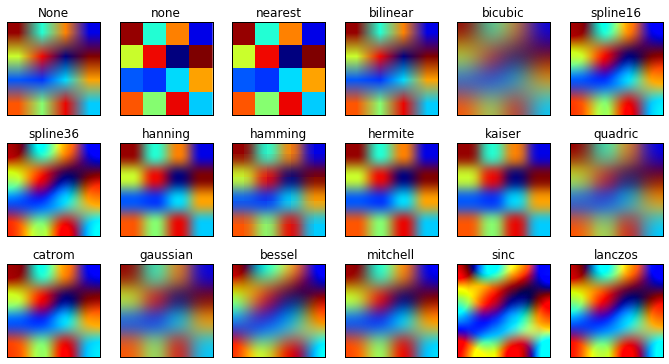

In [17]:
# from the docs:

# If interpolation is None, default to rc image.interpolation. See also
# the filternorm and filterrad parameters. If interpolation is 'none', then
# no interpolation is performed on the Agg, ps and pdf backends. Other
# backends will fall back to 'nearest'.
#
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

grid = np.random.rand(4, 4)

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(grid, interpolation=interp_method)
    ax.set_title(interp_method)

plt.show()

### Ellipse

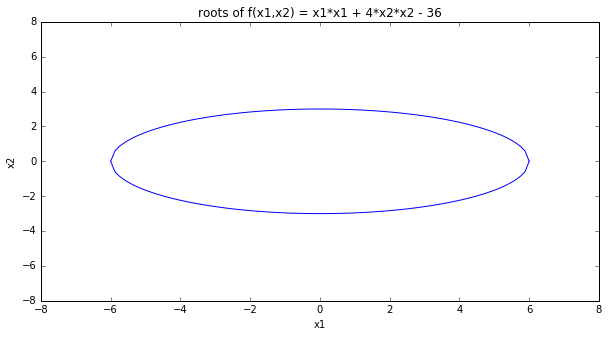

In [18]:
# draws f(x1,x2) = x1*x1 + 4*x2*x2 - 36 = 0
x1 = np.linspace(-6, 6, 100)
x2 = np.array([np.sqrt((36-i*i)/4) for i in x1])

plt.figure(figsize=(10,5))
plt.plot(x1,x2)
plt.plot(x1,-1*x2,'b')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("roots of f(x1,x2) = x1*x1 + 4*x2*x2 - 36")

### Contours

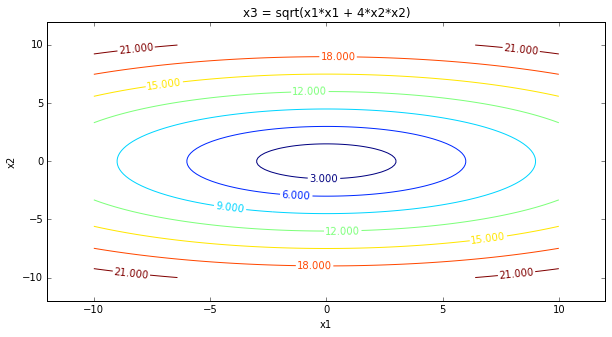

In [19]:
X = np.linspace(-10, 10, num=100)
Y = np.linspace(-10, 10, num=100)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + 4*Y**2)

plt.figure(figsize=(10,5))
CS = plt.contour(X, Y, Z)
# manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
# plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('labels at selected locations')
plt.xlim(-12, 12)
plt.ylim(-12, 12)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("x3 = sqrt(x1*x1 + 4*x2*x2)")

### Gradient Descent

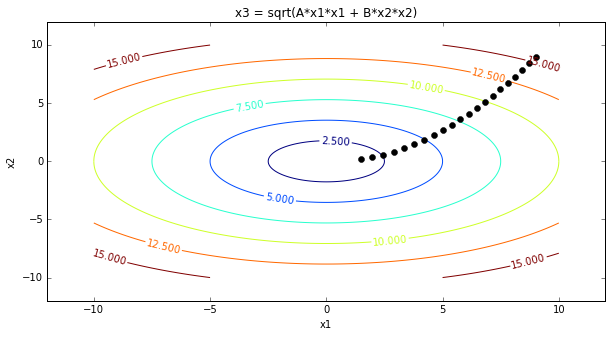

In [20]:
# X = np.sqrt(A*X1**2 + B*X2**2)
A = 1
B = 2
X1 = np.linspace(-10, 10, num=201)
X2 = np.linspace(-10, 10, num=201)
X1, X2 = np.meshgrid(X1, X2)
Z = np.sqrt(A*X1**2 + B*X2**2)

plt.figure(figsize=(10,5))
CS = plt.contour(X1, X2, Z)
# manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
# plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('labels at selected locations')
plt.xlim(-12, 12)
plt.ylim(-12, 12)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("x3 = sqrt(A*x1*x1 + B*x2*x2)")

def gradient(x1, x2): 
    return np.array([A*x1,B*x2])/(2*np.sqrt(A*x1*x1+B*x2*x2))

X1 = [9]
X2 = [9]
alpha = 1
for i in range(20):
    g = gradient(X1[-1],X2[-1])
    X1.append(X1[-1]-alpha*g[0])
    X2.append(X2[-1]-alpha*g[1])

plt.plot(X1, X2, 'ko')

### Surface

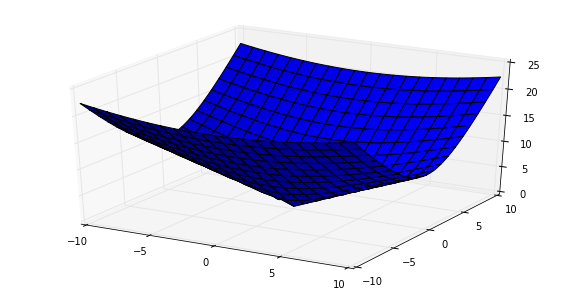

In [21]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10,5))
X = np.linspace(-10, 10, num=201)
Y = np.linspace(-10, 10, num=201)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + 4*Y**2)

plt.figure(figsize=(10,5))
ax = plt.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)

### Beta Distribution

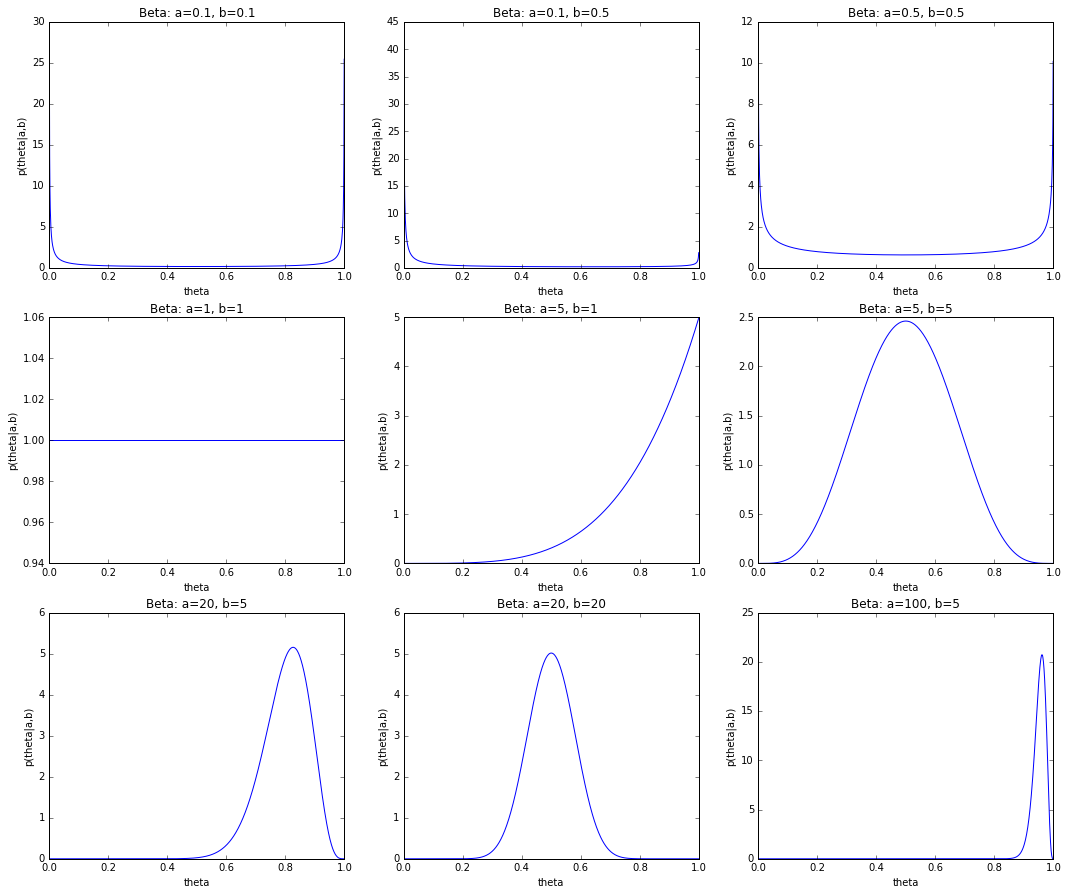

In [22]:
def beta(mu,a,b):
    return sp.gamma(a+b)/(sp.gamma(a)*sp.gamma(b))*np.power(mu,a-1)*np.power(1-mu,b-1)

fig = plt.figure(figsize=(18,15))
gs = gridspec.GridSpec(3, 3, width_ratios=[3, 3, 3]) 

thetas = np.arange(0,1,1e-3)
a_s = [0.1, 0.1, 0.5, 1, 5, 5, 20, 20, 100]
b_s = [0.1, 0.5, 0.5, 1, 1, 5, 5, 20, 5]
for i in range(9): 
    probs = beta(thetas,a_s[i],b_s[i])
    ax = plt.subplot(gs[i])
    ax.plot(thetas,probs)
    plt.xlabel("theta")
    plt.ylabel("p(theta|a,b)")
    plt.title("Beta: a=" + str(a_s[i]) + ", b=" + str(b_s[i]))

### Matrix

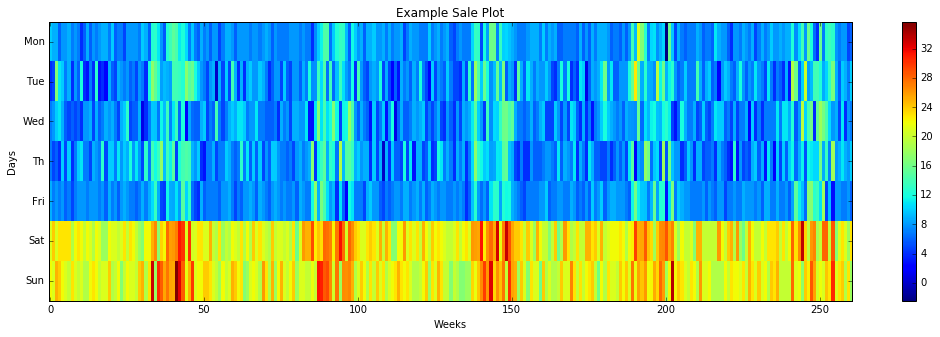

In [23]:
R = 7
C = 261
hist = np.ones((R,C))*3
for i in range(5):
    tmp = np.random.normal(8,1+np.random.random()*2,C)
    hist[i,:] = [int(t) for t in tmp]
for i in range(5,7):
    tmp = np.random.normal(22,2,C)
    hist[i,:] = [int(t) for t in tmp]
for d in range(7):
    for i in range(40,C,52):
        hist[d,i-7:i+7] += np.random.normal(4,3,14)

y_tick_labels = ['Mon','Tue','Wed','Th','Fri','Sat','Sun']
fig = plt.figure(figsize=(18,5))
ax = fig.gca()
plt.imshow(hist,interpolation='nearest', aspect='auto')
ax.set_yticks(np.arange(R), minor=False)
ax.set_yticklabels(y_tick_labels)
ax.set_title("Example Sale Plot")
ax.set_xlabel("Weeks")
ax.set_ylabel("Days")
plt.colorbar()
plt.show()